# 1. [Python] Writing a function

In [1]:
import pandas as pd

In [2]:

user_data= {'user_id' : [1,1,1,1,2,2,2,2,3,3,3],
 'insert_time' : ['3/1/20', '3/15/20', '4/15/20','6/2/20', '3/5/20','4/10/20','5/10/20','8/5/20','5/10/20','7/5/20','8/5/20']}
df = pd.DataFrame (user_data)
df['insert_time'] = pd.to_datetime(df['insert_time'])


In [3]:
df

,user_id,insert_time
0,1,2020-03-01
1,1,2020-03-15
2,1,2020-04-15
3,1,2020-06-02
4,2,2020-03-05
5,2,2020-04-10
6,2,2020-05-10
7,2,2020-08-05
8,3,2020-05-10
9,3,2020-07-05


In [4]:
def dead_user(df):
    df['new_time'] = df.groupby('user_id')[['user_id','insert_time']].shift(-1).fillna(pd.to_datetime('8/13/20'))
    df['difference'] = df['new_time'] - df['insert_time']
    df['difference'] = df['difference'].dt.days
    df['dead_user'] = df['difference'].apply(lambda x: True if x > 60 else False)
    
    map_users = {}
    processed_users = []
    user_status = []
    for _, row in df.iterrows():
        user = row['user_id']
        dead = row['dead_user']

        if user in processed_users:
            continue


        if user not in map_users.keys():
            user_status = []
            user_status.append(dead)
            user_status.append(1)
            map_users[user] = user_status

        else:
            user_status = map_users[user]
            user_status[0] = dead
            user_status[1] = user_status[1] + 1
            map_users[user] = user_status


        if dead:
            processed_users.append(user)


    print(map_users)
    
    

In [5]:
dead_user(df)

{1: [True, 4], 2: [True, 3], 3: [False, 3]}


# Part 2: Exploratory Data Analysis


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data = pd.read_excel('sample_dataset.xlsx')

In [8]:
data

,Week,Marketing Spend,Paid Installs,Paid Trials,Paid tLTV,Organic Installs,Organic Trials,Organic tLTV
0,2019-09-01,19083,6449,1085,55.79,6459,853,49.91
1,2019-08-25,31614,9823,1647,51.87,9992,1331,47.25
2,2019-08-18,35567,11735,1984,52.01,6993,992,47.67
3,2019-08-11,43331,13569,2306,52.29,7308,1105,51.10
4,2019-08-04,45809,13822,2380,53.76,8154,1167,52.01
5,2019-07-28,45894,14633,2548,54.60,8113,857,50.40
6,2019-07-21,52387,15254,2476,53.41,7328,991,52.50
7,2019-07-14,42309,14157,2175,54.11,7413,1021,54.81
8,2019-07-07,44895,14538,2561,58.24,7897,1183,56.49
9,2019-06-30,58412,15489,2627,57.96,7617,1135,59.57


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Week              12 non-null     datetime64[ns]
 1   Marketing Spend   12 non-null     int64         
 2   Paid Installs     12 non-null     int64         
 3   Paid Trials       12 non-null     int64         
 4   Paid tLTV         12 non-null     float64       
 5   Organic Installs  12 non-null     int64         
 6   Organic Trials    12 non-null     int64         
 7   Organic tLTV      12 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 896.0 bytes


### 1. Calculate eCPI and eCPT for each week.

In [10]:
data['eCPI'] = data['Marketing Spend'] / (data['Paid Installs'] + data['Organic Installs'])
data['eCPT'] = data['Marketing Spend'] / (data['Paid Trials'] + data['Organic Trials'])



In [11]:
print('eCPI and eCPT per week')
display(data.groupby('Week')[['eCPI', 'eCPT']].sum())

eCPI and eCPT per week


,eCPI,eCPT
Week,,
2019-06-16,2.664382,16.282384
2019-06-23,2.381694,13.822928
2019-06-30,2.528001,15.526847
2019-07-07,2.001114,11.991186
2019-07-14,1.961474,13.238110
2019-07-21,2.319857,15.110182
2019-07-28,2.017673,13.478414
2019-08-04,2.084501,12.914858
2019-08-11,2.075538,12.703313


### 2. What is the relationship between Marketing Spend and eCPI?

[Text(0.5, 1.0, 'Relationship between Marketing Spend and eCPI')]

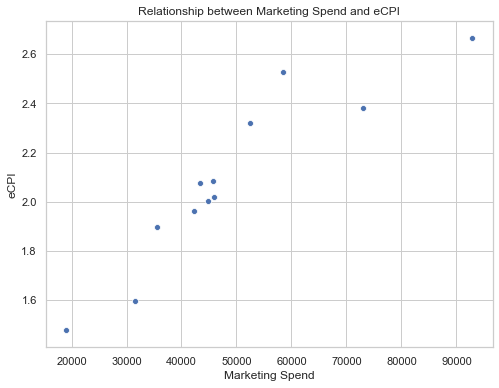

In [12]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')
sns.scatterplot(data = data, x = 'Marketing Spend', y = 'eCPI').set(title='Relationship between Marketing Spend and eCPI')



[Text(0.5, 1.0, 'Linear regression - Marketing Spend and eCPI')]

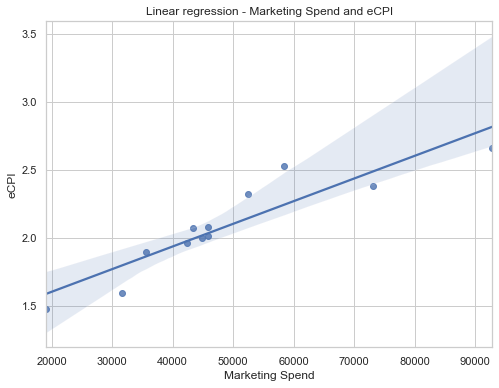

In [13]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')

sns.regplot(data = data, x = 'Marketing Spend', y = 'eCPI').set(title='Linear regression - Marketing Spend and eCPI')


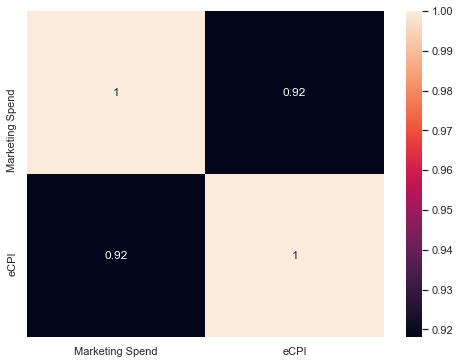

In [14]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(data = data[['Marketing Spend', 'eCPI']].corr(), annot = True)

The relationship is linear

### 3. Assuming this relationship holds, what would eCPI be if we spent $200,000 in a week?







In [15]:
x = data['Marketing Spend'].to_numpy()
y = data['eCPI'].to_numpy()

In [16]:
def estimate_coef(x, y):
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
            marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()




In [17]:
b_200 = estimate_coef(x,y)

In [18]:
y_pred_200 = b_200[0] + b_200[1]*200000
y_pred_200

4.598851354240258

If we spend 200 000$ in a week, eCPI would be 4.59

### 4. Does Marketing Spend effect Organic Installs?

[Text(0.5, 1.0, 'Linear regression - Marketing Spend and Organic Installs')]

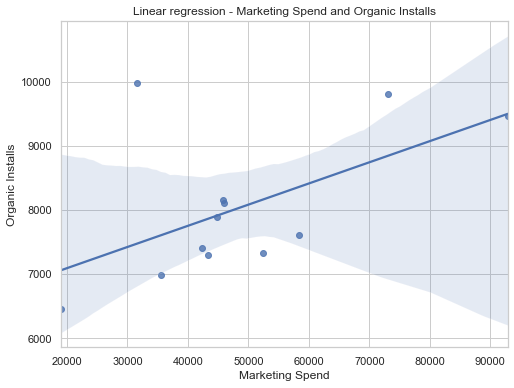

In [19]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')

sns.regplot(data = data, x = 'Marketing Spend', y = 'Organic Installs').set(title='Linear regression - Marketing Spend and Organic Installs')


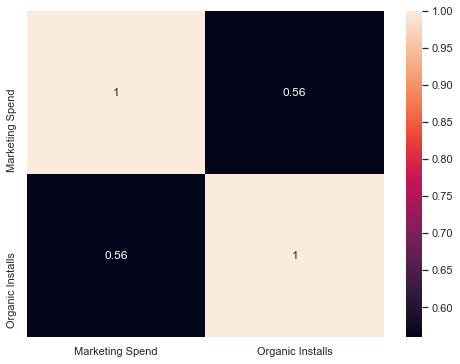

In [20]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(data = data[['Marketing Spend', 'Organic Installs']].corr(), annot = True)

In [21]:
mkt_inst = data[['Week','Marketing Spend', 'Organic Installs']].sort_values('Marketing Spend', ascending = False)
mkt_inst

,Week,Marketing Spend,Organic Installs
11,2019-06-16,92891,9481
10,2019-06-23,73068,9820
9,2019-06-30,58412,7617
6,2019-07-21,52387,7328
5,2019-07-28,45894,8113
4,2019-08-04,45809,8154
8,2019-07-07,44895,7897
3,2019-08-11,43331,7308
7,2019-07-14,42309,7413
2,2019-08-18,35567,6993


In [22]:
mkt_inst['outlier'] = mkt_inst['Marketing Spend'].apply(lambda x: True if x == 31614 or x == 73068 else False)
mkt_inst

,Week,Marketing Spend,Organic Installs,outlier
11,2019-06-16,92891,9481,False
10,2019-06-23,73068,9820,True
9,2019-06-30,58412,7617,False
6,2019-07-21,52387,7328,False
5,2019-07-28,45894,8113,False
4,2019-08-04,45809,8154,False
8,2019-07-07,44895,7897,False
3,2019-08-11,43331,7308,False
7,2019-07-14,42309,7413,False
2,2019-08-18,35567,6993,False


In [23]:
outlier = mkt_inst[mkt_inst['outlier'] == False].reset_index().drop('index', axis = 1)

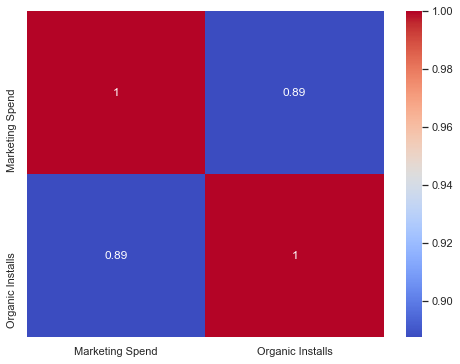

In [24]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(data = outlier[['Marketing Spend', 'Organic Installs']].corr(), annot = True, cmap = 'coolwarm')

[Text(0.5, 1.0, 'Linear regression - Marketing Spend and Organic Installs, without outliers')]

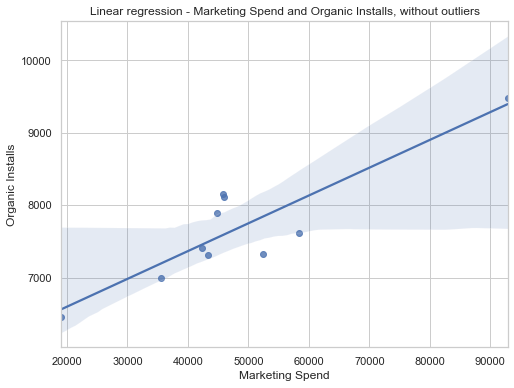

In [25]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')

sns.regplot(data = outlier, x = 'Marketing Spend', 
            y = 'Organic Installs').set(title='Linear regression - Marketing Spend and Organic Installs, without outliers')


In [26]:
#5. Can we infer how many Organic Installs we’d generate if we spent $0 in Marketing Spend?
x_mkt_out = data['Marketing Spend'].to_numpy()
y_oinst_out = data['Organic Installs'].to_numpy()

x_mkt_wout = outlier['Marketing Spend'].to_numpy()
y_oinst_wout = outlier['Organic Installs'].to_numpy()

In [27]:
outlier_coeff = estimate_coef(x_mkt_out, y_oinst_out)
without_outlier_coeff = estimate_coef(x_mkt_wout, y_oinst_wout)

In [28]:
outlier_coeff

(6434.868015651576, 0.03307347813310511)

In [29]:
without_outlier_coeff

(5830.937790809061, 0.03839880746082715)

In [30]:
b_out = [6434.868015651576, 0.03307347813310511]
y_pred_out = b_out[0] + b_out[1]*0

In [31]:
b_wout = [5830.937790809061, 0.03839880746082715]
y_pred_wout = b_wout[0] + b_wout[1]*0

In [32]:
print('If we spend 0$ on Marketing, we will have ', int(y_pred_out), 'Oragnic Installs if outliers are included.',
      '\nIf we exlude outliers, number of Organic Installs would be ', int(y_pred_wout))

If we spend 0$ on Marketing, we will have  6434 Oragnic Installs if outliers are included. 
If we exlude outliers, number of Organic Installs would be  5830


### 6. Estimate how many Total Installs would we would generate if we spent $200,000.




In [33]:
data['Total Installs'] = data['Organic Installs'] + data['Paid Installs']

In [34]:
data

,Week,Marketing Spend,Paid Installs,Paid Trials,Paid tLTV,Organic Installs,Organic Trials,Organic tLTV,eCPI,eCPT,Total Installs
0,2019-09-01,19083,6449,1085,55.79,6459,853,49.91,1.478385,9.846749,12908
1,2019-08-25,31614,9823,1647,51.87,9992,1331,47.25,1.595458,10.615850,19815
2,2019-08-18,35567,11735,1984,52.01,6993,992,47.67,1.899135,11.951277,18728
3,2019-08-11,43331,13569,2306,52.29,7308,1105,51.10,2.075538,12.703313,20877
4,2019-08-04,45809,13822,2380,53.76,8154,1167,52.01,2.084501,12.914858,21976
5,2019-07-28,45894,14633,2548,54.60,8113,857,50.40,2.017673,13.478414,22746
6,2019-07-21,52387,15254,2476,53.41,7328,991,52.50,2.319857,15.110182,22582
7,2019-07-14,42309,14157,2175,54.11,7413,1021,54.81,1.961474,13.238110,21570
8,2019-07-07,44895,14538,2561,58.24,7897,1183,56.49,2.001114,11.991186,22435
9,2019-06-30,58412,15489,2627,57.96,7617,1135,59.57,2.528001,15.526847,23106


[Text(0.5, 1.0, 'Linear regression - Marketing Spend and Total Installs')]

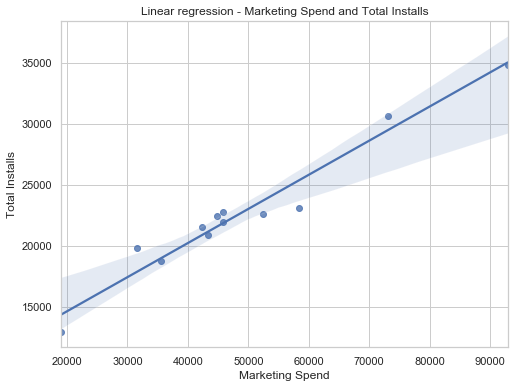

In [35]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')

sns.regplot(data = data, x = 'Marketing Spend', 
            y = 'Total Installs').set(title='Linear regression - Marketing Spend and Total Installs')


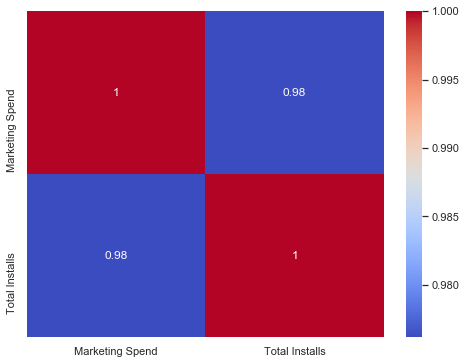

In [36]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(data = data[['Marketing Spend', 'Total Installs']].corr(), annot = True, cmap = 'coolwarm')

In [37]:
x_total = data['Marketing Spend'].to_numpy()
y_total = data['Total Installs'].to_numpy()

In [38]:
total_coeff = estimate_coef(x_total, y_total)

In [39]:

y_pred_total = total_coeff[0] + total_coeff[1]*200000

In [40]:
y_pred_total

65031.837339451355

If we spend 200 000$, number of total installs would be 65031.

### 7. What is our most recent overall tLTV (blending paid and organic)?

In [41]:
data['tLTV_overall'] = data['Organic tLTV'] + data['Paid tLTV']
tLTV = data.pivot_table(index = 'Week', values = 'tLTV_overall', aggfunc = sum).sort_index(ascending = False)
print("Most recent tLTV = ", float((tLTV.iloc[0])))
tLTV

Most recent tLTV =  105.69999999999999


,tLTV_overall
Week,
2019-09-01,105.70
2019-08-25,99.12
2019-08-18,99.68
2019-08-11,103.39
2019-08-04,105.77
2019-07-28,105.00
2019-07-21,105.91
2019-07-14,108.92
2019-07-07,114.73


### 8. Can you figure out the LTV of an installs (iLTV = LTV / Install) for each week?

In [42]:
#(tLTV = LTV / Trial)

In [43]:
data['LTV'] = (data['Organic tLTV'] * data['Organic Trials'])  +  (data['Paid tLTV'] * data['Paid Trials'])

In [44]:
#(iLTV = LTV / Install)

data['iLTV'] = data['LTV']/(data['Paid Installs']+data['Organic Installs'])


In [45]:
data

,Week,Marketing Spend,Paid Installs,Paid Trials,Paid tLTV,Organic Installs,Organic Trials,Organic tLTV,eCPI,eCPT,Total Installs,tLTV_overall,LTV,iLTV
0,2019-09-01,19083,6449,1085,55.79,6459,853,49.91,1.478385,9.846749,12908,105.70,103105.38,7.987711
1,2019-08-25,31614,9823,1647,51.87,9992,1331,47.25,1.595458,10.615850,19815,99.12,148319.64,7.485220
2,2019-08-18,35567,11735,1984,52.01,6993,992,47.67,1.899135,11.951277,18728,99.68,150476.48,8.034840
3,2019-08-11,43331,13569,2306,52.29,7308,1105,51.10,2.075538,12.703313,20877,103.39,177046.24,8.480445
4,2019-08-04,45809,13822,2380,53.76,8154,1167,52.01,2.084501,12.914858,21976,105.77,188644.47,8.584113
5,2019-07-28,45894,14633,2548,54.60,8113,857,50.40,2.017673,13.478414,22746,105.00,182313.60,8.015194
6,2019-07-21,52387,15254,2476,53.41,7328,991,52.50,2.319857,15.110182,22582,105.91,184270.66,8.160068
7,2019-07-14,42309,14157,2175,54.11,7413,1021,54.81,1.961474,13.238110,21570,108.92,173650.26,8.050545
8,2019-07-07,44895,14538,2561,58.24,7897,1183,56.49,2.001114,11.991186,22435,114.73,215980.31,9.626936
9,2019-06-30,58412,15489,2627,57.96,7617,1135,59.57,2.528001,15.526847,23106,117.53,219872.87,9.515834


### 9. Create a chart showing the trend of Profit per Trial and profit per install over the weeks.

In [46]:
# Profit = Revenue - Spend


In [47]:
data['Profit'] = data['LTV'] - data['Marketing Spend']
data['Profit per trial'] = data['Profit'] / (data['Paid Trials'] + data['Organic Trials'])
data['Profit per install'] = data['Profit'] / (data['Paid Installs'] + data['Organic Installs'])

In [48]:
profit = data[['Week', 'Profit per trial', 'Profit per install']]
profit = profit.sort_values('Week', ascending = True)
profit



,Week,Profit per trial,Profit per install
11,2019-06-16,39.265322,6.425214
10,2019-06-23,38.901546,6.702747
9,2019-06-30,42.918892,6.987833
8,2019-07-07,45.695863,7.625822
7,2019-07-14,41.095513,6.089071
6,2019-07-21,38.039706,5.840212
5,2019-07-28,40.064493,5.997520
4,2019-08-04,40.269374,6.499612
3,2019-08-11,39.201184,6.404907
2,2019-08-18,38.612056,6.135705


Text(0.5, 1.0, ' Profit per Trial and profit per install over the weeks')

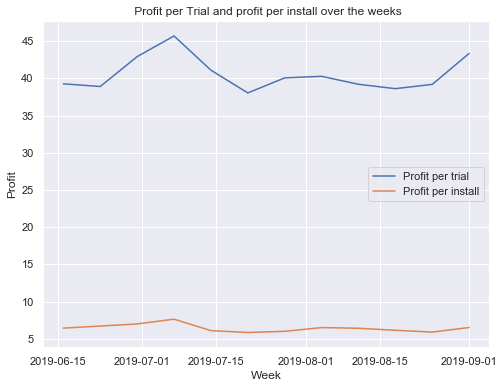

In [49]:
plt.plot('Week', 'Profit per trial', data = profit)
plt.plot('Week', 'Profit per install', data = profit)
plt.legend()
plt.xlabel('Week')
plt.ylabel('Profit')
plt.title(' Profit per Trial and profit per install over the weeks')


### 10. What level of Marketing Spend gets Margin > 75%?

In [50]:
#Margin = (Revenue - Spend) / Revenue

In [51]:
data['Margin'] = data['Profit'] / data['LTV']

In [52]:
data[data['Margin'] > 0.75]

,Week,Marketing Spend,Paid Installs,Paid Trials,Paid tLTV,Organic Installs,Organic Trials,Organic tLTV,eCPI,eCPT,Total Installs,tLTV_overall,LTV,iLTV,Profit,Profit per trial,Profit per install,Margin
0,2019-09-01,19083,6449,1085,55.79,6459,853,49.91,1.478385,9.846749,12908,105.70,103105.38,7.987711,84022.38,43.355201,6.509326,0.814918
1,2019-08-25,31614,9823,1647,51.87,9992,1331,47.25,1.595458,10.615850,19815,99.12,148319.64,7.485220,116705.64,39.189268,5.889762,0.786852
2,2019-08-18,35567,11735,1984,52.01,6993,992,47.67,1.899135,11.951277,18728,99.68,150476.48,8.034840,114909.48,38.612056,6.135705,0.763637
3,2019-08-11,43331,13569,2306,52.29,7308,1105,51.10,2.075538,12.703313,20877,103.39,177046.24,8.480445,133715.24,39.201184,6.404907,0.755256
4,2019-08-04,45809,13822,2380,53.76,8154,1167,52.01,2.084501,12.914858,21976,105.77,188644.47,8.584113,142835.47,40.269374,6.499612,0.757168
7,2019-07-14,42309,14157,2175,54.11,7413,1021,54.81,1.961474,13.238110,21570,108.92,173650.26,8.050545,131341.26,41.095513,6.089071,0.756355
8,2019-07-07,44895,14538,2561,58.24,7897,1183,56.49,2.001114,11.991186,22435,114.73,215980.31,9.626936,171085.31,45.695863,7.625822,0.792134


### Bonus 2. In relative terms, when has eCPI been more expensive than eCPT? (Hint: Normalize or standardize the data.)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,1:])

In [54]:
scaled_data

array([[-1.60685726e+00, -1.77402995e+00, -1.74403152e+00,
         7.09718745e-01, -1.45534509e+00, -1.30964057e+00,
        -7.67215666e-01, -1.80928816e+00, -1.78958213e+00,
        -1.84601478e+00, -2.34569540e-01, -1.66229962e+00,
        -8.03772972e-01, -1.65883334e+00,  1.26836131e+00,
         1.71509669e-01,  1.98193235e+00],
       [-9.28634539e-01, -1.04350988e+00, -1.03969302e+00,
        -1.16796234e+00,  1.78065483e+00,  8.61486110e-01,
        -1.51796748e+00, -1.45949337e+00, -1.36954262e+00,
        -5.42623613e-01, -1.48265653e+00, -8.43876572e-01,
        -1.57770338e+00, -7.86435451e-01, -6.15721085e-01,
        -1.09831442e+00,  1.04138670e+00],
       [-7.14683982e-01, -6.29534076e-01, -6.17340579e-01,
        -1.10090230e+00, -9.66235563e-01, -6.78287834e-01,
        -1.39942772e+00, -5.52152671e-01, -6.40207040e-01,
        -7.47746850e-01, -1.37643636e+00, -8.04835624e-01,
        -7.31186555e-01, -8.34379450e-01, -8.76770406e-01,
        -5.94243986e-01,  2.6

In [55]:
scaled_data = pd.DataFrame(scaled_data, columns = ['Marketing Spend', 'Paid Installs', 'Paid Trials', 'Paid tLTV',
       'Organic Installs', 'Organic Trials', 'Organic tLTV', 'eCPI', 'eCPT',
       'tLTV_overall', 'Total Installs', 'LTV', 'iLTV', 'Profit',
       'Profit per trial', 'Profit per install', 'Margin'])

In [56]:
data.columns

Index(['Week', 'Marketing Spend', 'Paid Installs', 'Paid Trials', 'Paid tLTV',
       'Organic Installs', 'Organic Trials', 'Organic tLTV', 'eCPI', 'eCPT',
       'Total Installs', 'tLTV_overall', 'LTV', 'iLTV', 'Profit',
       'Profit per trial', 'Profit per install', 'Margin'],
      dtype='object')

In [57]:
scaled_data[scaled_data['eCPI']>scaled_data['eCPT']]

,Marketing Spend,Paid Installs,Paid Trials,Paid tLTV,Organic Installs,Organic Trials,Organic tLTV,eCPI,eCPT,tLTV_overall,Total Installs,LTV,iLTV,Profit,Profit per trial,Profit per install,Margin
2,-0.714684,-0.629534,-0.617341,-1.100902,-0.966236,-0.678288,-1.399428,-0.552153,-0.640207,-0.747747,-1.376436,-0.804836,-0.731187,-0.834379,-0.876770,-0.594244,0.263396
3,-0.294468,-0.232446,-0.213787,-0.966782,-0.677716,-0.165030,-0.431353,-0.025088,-0.229487,-0.342218,-0.672728,-0.323897,-0.044872,-0.332407,-0.610332,-0.042502,-0.017490
4,-0.160350,-0.177668,-0.121045,-0.262652,0.097165,0.116581,-0.174517,0.001694,-0.113953,-0.134830,-0.221292,-0.113957,0.114797,-0.088965,-0.127233,0.151600,0.046570
8,-0.209819,-0.022644,0.105797,1.883269,-0.138230,0.189254,1.089907,-0.247454,-0.618411,-0.048214,1.478231,0.380849,1.720939,0.665094,2.326947,2.459819,1.218388
9,0.521769,0.183262,0.188513,1.749149,-0.394692,-0.028767,1.959199,1.326805,1.312569,0.078407,2.009332,0.451308,1.549822,0.408193,1.071036,1.152232,-0.718532
10,1.315005,1.345945,1.491915,-0.933252,1.623114,2.169613,0.260129,0.889661,0.381984,1.507477,-0.194737,1.516166,0.885396,1.587273,-0.745846,0.567934,-0.601582
11,2.387897,2.325456,2.238865,0.475009,1.312612,1.365660,1.030637,1.734288,1.725201,2.297210,0.880742,2.207589,0.893335,2.077750,-0.581325,-0.000882,-1.638850


In [58]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
transformed_data = transformer.fit_transform(data.iloc[:,1:])

In [59]:
transformed_data = pd.DataFrame(transformed_data, columns = ['Marketing Spend', 'Paid Installs', 'Paid Trials', 'Paid tLTV',
       'Organic Installs', 'Organic Trials', 'Organic tLTV', 'eCPI', 'eCPT',
       'tLTV_overall', 'Total Installs', 'LTV', 'iLTV', 'Profit',
       'Profit per trial', 'Profit per install', 'Margin'])

In [60]:
transformed_data

,Marketing Spend,Paid Installs,Paid Trials,Paid tLTV,Organic Installs,Organic Trials,Organic tLTV,eCPI,eCPT,tLTV_overall,Total Installs,LTV,iLTV,Profit,Profit per trial,Profit per install,Margin
0,0.000000,0.000000,0.000000,0.615385,0.000000,0.000000,0.215909,0.000000,0.000000,0.000000,0.357414,0.000000,0.234621,0.000000,0.694277,0.374726,1.000000
1,0.169778,0.178198,0.176841,0.000000,1.000000,0.624021,0.000000,0.098712,0.119507,0.314584,0.000000,0.211485,0.000000,0.233475,0.150149,0.027750,0.740237
2,0.223336,0.279180,0.282882,0.021978,0.151146,0.181462,0.034091,0.354765,0.327012,0.265076,0.030418,0.221573,0.256626,0.220644,0.074757,0.165486,0.525369
3,0.328528,0.376043,0.384204,0.065934,0.240306,0.328982,0.312500,0.503503,0.443867,0.362953,0.231939,0.345851,0.464685,0.354984,0.151705,0.316248,0.447793
4,0.362102,0.389405,0.407489,0.296703,0.479762,0.409922,0.386364,0.511061,0.476738,0.413008,0.361217,0.400100,0.513090,0.420135,0.291226,0.369286,0.465485
5,0.363253,0.432238,0.460352,0.428571,0.468157,0.005222,0.255682,0.454713,0.564306,0.448078,0.319392,0.370488,0.247453,0.374303,0.264465,0.088098,0.383122
6,0.451225,0.465036,0.437697,0.241758,0.245967,0.180157,0.426136,0.709506,0.817858,0.440608,0.368821,0.379642,0.315097,0.341900,0.000000,0.000000,0.081733
7,0.314681,0.407098,0.342983,0.351648,0.270025,0.219321,0.613636,0.407327,0.526966,0.394516,0.532319,0.329966,0.263959,0.338025,0.399131,0.139369,0.457965
8,0.349718,0.427221,0.464443,1.000000,0.407020,0.430809,0.750000,0.440751,0.333213,0.433913,0.847909,0.527960,1.000000,0.621939,1.000000,1.000000,0.789122
9,0.532856,0.477448,0.485211,0.956044,0.327767,0.368146,1.000000,0.885008,0.882601,0.464474,1.000000,0.546168,0.948125,0.553186,0.637289,0.642705,0.254177


In [61]:
tr_data = transformed_data[transformed_data['eCPI']>transformed_data['eCPT']].reset_index()

In [62]:
data_copy = data.copy()

In [63]:
data_copy = data_copy.reset_index()

In [64]:
data_copy = data_copy.merge(tr_data, how ='inner', on = 'index')
data_copy = data_copy.iloc[:,1:15]

In [65]:
data_copy

,Week,Marketing Spend_x,Paid Installs_x,Paid Trials_x,Paid tLTV_x,Organic Installs_x,Organic Trials_x,Organic tLTV_x,eCPI_x,eCPT_x,Total Installs_x,tLTV_overall_x,LTV_x,iLTV_x
0,2019-08-18,35567,11735,1984,52.01,6993,992,47.67,1.899135,11.951277,18728,99.68,150476.48,8.034840
1,2019-08-11,43331,13569,2306,52.29,7308,1105,51.10,2.075538,12.703313,20877,103.39,177046.24,8.480445
2,2019-08-04,45809,13822,2380,53.76,8154,1167,52.01,2.084501,12.914858,21976,105.77,188644.47,8.584113
3,2019-07-07,44895,14538,2561,58.24,7897,1183,56.49,2.001114,11.991186,22435,114.73,215980.31,9.626936
4,2019-06-30,58412,15489,2627,57.96,7617,1135,59.57,2.528001,15.526847,23106,117.53,219872.87,9.515834
5,2019-06-23,73068,20859,3667,52.36,9820,1619,53.55,2.381694,13.822928,30679,105.91,278701.57,9.084441
6,2019-06-16,92891,25383,4263,55.30,9481,1442,56.28,2.664382,16.282384,34864,111.58,316899.66,9.089596
